# NCI dataset

In [1]:
import numpy as np
import os,sys
module_path = os.path.abspath(os.path.join('/Users/vayer/Documents/OT/Python/GW_tests/'))
if module_path not in sys.path:
    sys.path.append(module_path)
from graph import *
import copy
import NN,time
from sklearn.model_selection import StratifiedKFold
import ot_distances
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


In [2]:
path='./NCI1/'

In [3]:
dataset=build_NCI1_dataset(path)
X,y=zip(*dataset)

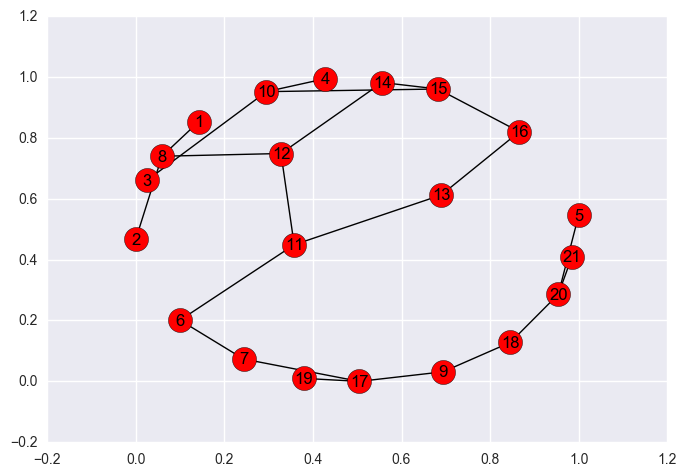

In [4]:
dataset[0][0].display_graph()

In [5]:
emd_clf=NN.Graph_EMD_1NN_Classifier(features_metric='dirac')
gw_clf=NN.Graph_GW_1NN_Classifier(1000,method='shortest_path',normalize_distance=False)
wgw_clf=NN.Graph_WGW_1NN_Classifier(5,25,method='shortest_path',features_metric='dirac',normalize_distance=False)

In [20]:
preds=emd_clf.fit(np.array(x_test),np.array(y_test)).predict(np.array(x_test))

In [31]:
emd_clf.compute_similarity(x_test[0],x_test[7])

0.0

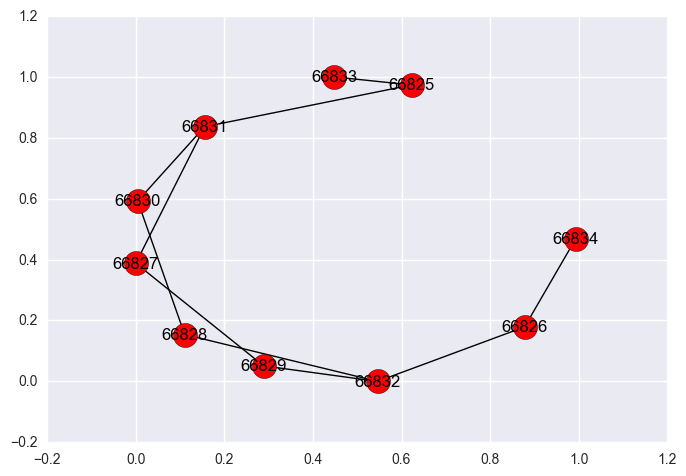

In [32]:
x_test[0].display_graph()

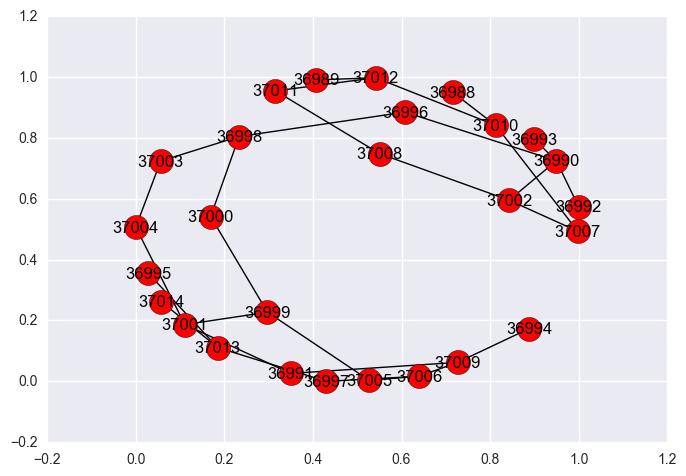

In [33]:
x_test[1].display_graph()

In [36]:
x_test[0].nx_graph.nodes(data=True)

[(66832, {'attr_name': 3}),
 (66833, {'attr_name': 3}),
 (66834, {'attr_name': 3}),
 (66825, {'attr_name': 4}),
 (66826, {'attr_name': 4}),
 (66827, {'attr_name': 2}),
 (66828, {'attr_name': 2}),
 (66829, {'attr_name': 2}),
 (66830, {'attr_name': 2}),
 (66831, {'attr_name': 3})]

In [37]:
x_test[1].nx_graph.nodes(data=True)

[(36992, {'attr_name': 1}),
 (36993, {'attr_name': 1}),
 (36994, {'attr_name': 1}),
 (36995, {'attr_name': 1}),
 (36996, {'attr_name': 2}),
 (36997, {'attr_name': 2}),
 (36998, {'attr_name': 3}),
 (36999, {'attr_name': 3}),
 (37000, {'attr_name': 3}),
 (37001, {'attr_name': 3}),
 (37002, {'attr_name': 3}),
 (37003, {'attr_name': 3}),
 (37004, {'attr_name': 3}),
 (37005, {'attr_name': 3}),
 (37006, {'attr_name': 3}),
 (37007, {'attr_name': 3}),
 (37008, {'attr_name': 3}),
 (37009, {'attr_name': 3}),
 (37010, {'attr_name': 3}),
 (37011, {'attr_name': 3}),
 (37012, {'attr_name': 3}),
 (37013, {'attr_name': 3}),
 (37014, {'attr_name': 3}),
 (36988, {'attr_name': 5}),
 (36989, {'attr_name': 5}),
 (36990, {'attr_name': 4}),
 (36991, {'attr_name': 1})]

In [23]:
np.sum(preds==y_test)/len(y_test)

0.52380952380952384

In [17]:
A,B=split_train_test(dataset,0.99)
x_train,y_train=zip(*A)
x_test,y_test=zip(*B)

In [7]:
len(x_test)

42

In [8]:
emd_clf.fit(np.array(x_test),np.array(y_test))

Graph_EMD_1NN_Classifier(features_metric='dirac', parallel=False,
             similarity_measure=<function emd_graph_distance.<locals>.dist at 0x113cb8048>,
             the_lower_the_better=True)

In [9]:
preds=gw_clf.fit(np.array(x_test),np.array(y_test)).predict(np.array(x_test))

In [15]:
np.sum(preds==y_test)/len(y_test)

0.45238095238095238

In [13]:
len(y_test)

42

In [29]:
a=[]
for graph in X:
    a.append(np.max(graph.distance_matrix()))

In [31]:
np.array(a)

array([ 12.,  11.,  13., ...,  23.,  14.,  inf])

In [33]:
a[len(a)-1]

inf

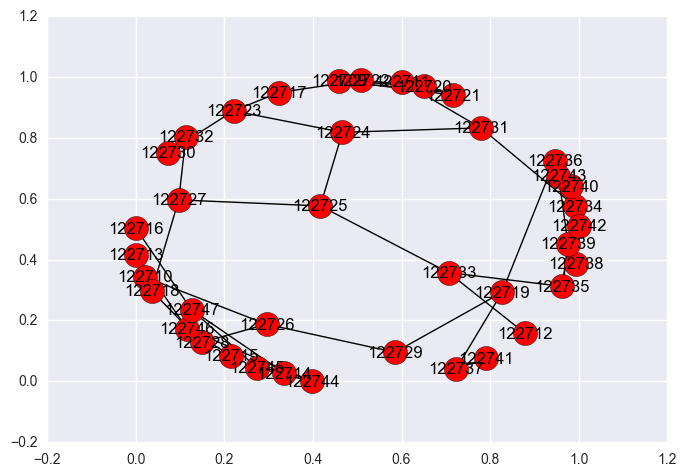

In [36]:
X[len(a)-1].display_graph()

In [63]:
gw_clf=NN.Graph_GW_1NN_Classifier(1000000,method='shortest_path',normalize_distance=False)

In [64]:
gw_clf.compute_similarity(X[len(a)-1],X[2])

nan

In [69]:
np.min([1, np.nan])

nan

In [65]:
gw_clf.compute_similarity(X[3],X[2])

17.102139585356809

In [67]:
a[3]

13.0

In [68]:
wgw_clf.fit(np.array(x_test),np.array(y_test))

Graph_WGW_1NN_Classifier(alpha=5, epsilon=25, features_metric='dirac',
             method='shortest_path', normalize_distance=False)

In [16]:
a=[1,2]

In [17]:
a[np.nan]

TypeError: list indices must be integers or slices, not float

In [18]:
type(np.nan)

float

In [15]:
a[np.nan]

NameError: name 'a' is not defined

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
X,y=zip(*dataset)

In [18]:
tuned_parameters = [{'epsilon':list(np.linspace(10,15,1))
                     ,'method':['shortest_path']
                     ,'normalize_distance':[False,True]}]
wgw_1NN=NN.Graph_GW_1NN_Classifier()
y2=np.array(y)
y2[y2==-1]=0 #je sais pas si ça sert à quelque chose

In [19]:
wgw_1NN.fit(np.array(X).reshape(-1,1),y2)